# **enhancment**
we have to make the quality of pixels better in two factors:

1) make the image brighter 

2) increase the contrast of the pixels


#**Import required libraries**

In [2]:
from matplotlib import image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image as im

##  make image brighter

In [14]:
def brightness(array1: np.ndarray):

    temporary = array1.copy()

    alpha = 0.06

    temporary[:, :, :] = 255 / \
        np.log10(1+255*alpha)*np.log10(1+alpha*temporary)

    return temporary


to reach brighter image we use logarithm transform function with 
alpha = 0.06

the logarithm transformation figure is as follows  :


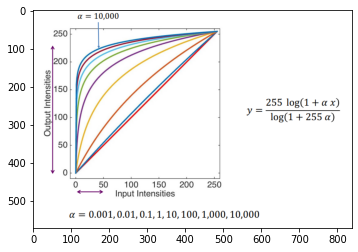

In [6]:
image=plt.imread("image1.PNG")
plt.imshow(image)
plt.show()

below are the two images one before(left image) and one after brightening(right image):

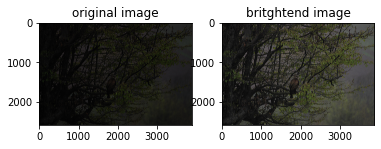

In [13]:
im1=plt.imread("Enhance1.JPG")
im2=plt.imread("britghtend_image.jpg")
plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(im1)

plt.subplot(1,2,2)
plt.title("britghtend image")
plt.imshow(im2)

## increase contrast of image by a linear transform

In [ ]:
def contrast(array1: np.ndarray):

    temporary = array1.copy()

    mins = [np.min(array1[:, :, 0]), np.min(
        array1[:, :, 1]), np.min(array1[:, :, 2])]

    maxs = [np.max(array1[:, :, 0]), np.max(
        array1[:, :, 1]), np.max(array1[:, :, 2])]

    constants = -255*np.divide(mins, np.subtract(maxs, mins))
    slope = 255/(np.subtract(maxs, mins))

    temporary[:, :, 0] = slope[0]*array1[:, :, 0]+constants[0]
    temporary[:, :, 1] = slope[1]*array1[:, :, 1]+constants[1]
    temporary[:, :, 2] = slope[2]*array1[:, :, 2]+constants[2]

    return temporary
# explanation :
# step1 : find minimum and maximum value of pixels in each R,G,B matrices
# step2 : make linear tranformation function based on min and max
# step3 : transformation is y=ax+b , where a is slope and b is constant

# ------------------------------------------------

to increase contrast of pixels we can use linear trasform that map minimum value of pixels to 0 and maximum value to 255(linear transorm).

figure of this transformation is as follows:

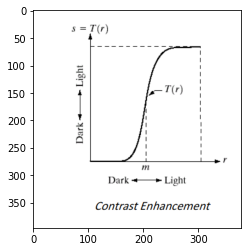

In [18]:
image=plt.imread("contrast fig.PNG")
plt.imshow(image)
plt.show()


below is the result of linear contrast enhancment to brightend image : 

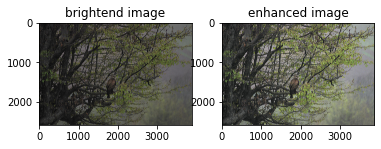

In [19]:
im1=plt.imread("brightened.jpg")
im2=plt.imread("res01(version1).jpg")
plt.subplot(1,2,1)
plt.title("brightend image")
plt.imshow(im1)

plt.subplot(1,2,2)
plt.title("enhanced image")
plt.imshow(im2)

## increase contrast of image by a exact histogram equalizer 

In [20]:
# ---------------------------------


def hist_calculator(img: np.ndarray):

    h_r: np.ndarray = cv2.calcHist([img], [0], None, [256], [0, 256])
    h_g: np.ndarray = cv2.calcHist([img], [1], None, [256], [0, 256])
    h_b: np.ndarray = cv2.calcHist([img], [2], None, [256], [0, 256])

    return h_r, h_g, h_b


# -------------------------------
def com_calculator(hr, hg, hb, size):

    commulative_r = np.zeros([256])
    commulative_g = np.zeros([256])
    commulative_b = np.zeros([256])

    for x in range(0, 256, 1):

        commulative_r[x] = round((255)*np.sum(hr[0:x+1]/size))

        commulative_g[x] = round((255)*np.sum(hg[0:x+1]/size))

        commulative_b[x] = round((255)*np.sum(hb[0:x+1]/size))

    return commulative_r, commulative_g, commulative_b


# -------------------------------
def apply_changes(img: np.ndarray, com_r, com_g, com_b):

    [c1, c2, c3] = img.shape

    for y in range(0, c1):

        for g in range(0, c2):

            img[y, g, 0] = com_r[img[y, g, 0]]
            img[y, g, 1] = com_g[img[y, g, 1]]
            img[y, g, 2] = com_b[img[y, g, 2]]

    return img


# -----------------------------

def histogram_equalizer(img: np.ndarray, size):

    [h_r, h_g, h_b] = hist_calculator(img)

    [com_r, com_g, com_b] = com_calculator(h_r, h_g, h_b, size)

    result = apply_changes(img, com_r, com_g, com_b)

    return result


# ----------------------------------------------

below is the result of exact histogram equalization to brightend image : 




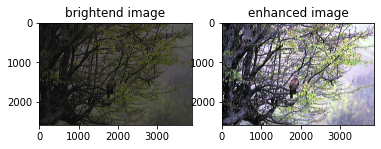

In [21]:
im1=plt.imread("britghtend_image.jpg")
im2=plt.imread("res01(version2).jpg")
plt.subplot(1,2,1)
plt.title("brightend image")
plt.imshow(im1)

plt.subplot(1,2,2)
plt.title("enhanced image")
plt.imshow(im2)


## final code :

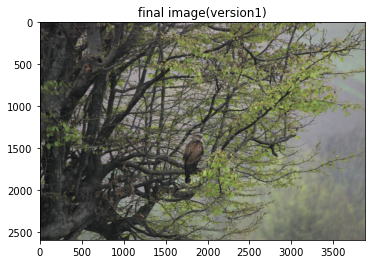

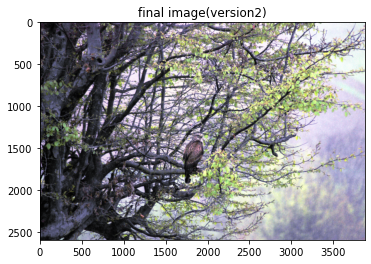

In [ ]:
img = plt.imread('Enhance1.jpg')  # read image
arr1 = np.array(img)  # convert to array

[c1, c2, c3] = arr1.shape
size = int(c1)*int(c2)


# ------------------
image1 = brightness(arr1)
final_image1 = contrast(image1)
final_image2 = histogram_equalizer(image1, size)


# ------------------
 
data = im.fromarray(final_image1)
data.save('res01(version1).jpg')  # save the result

data = im.fromarray(final_image2)
data.save('res01(version2).jpg')  # save the result

#----------------------
# showing image
plt.imshow(final_image1)
plt.title("final image(version1)")

plt.show()

plt.imshow(final_image2)
plt.title("final image(version2)")

plt.show()



